# Activity
Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [8]:
# Gera os dados
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

In [9]:
# Split 80/20
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]
trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

In [14]:
# Testa graus de 1 a 10
print(f"{'Grau':<8} {'R² Treino':<15} {'R² Teste':<15}")
print("-" * 40)

best_degree = 1
best_r2 = -999
best_model = None # Criamos uma variável para guardar o melhor modelo

for degree in range(1, 11):
    model = np.poly1d(np.polyfit(trainX, trainY, degree))
    r2_train = r2_score(trainY, model(trainX))
    r2_test = r2_score(testY, model(testX))
    
    print(f"{degree:<8} {r2_train:<15.4f} {r2_test:<15.4f}")

    if r2_test > best_r2:
        best_r2 = r2_test
        best_degree = degree
        best_model = model 

Grau     R² Treino       R² Teste       
----------------------------------------
1        0.2647          0.4225         
2        0.3616          0.2935         
3        0.4296          0.2727         
4        0.4831          0.3936         
5        0.5545          0.5041         
6        0.6025          0.6050         
7        0.6170          0.5461         
8        0.6427          0.3002         
9        0.6634          0.2162         
10       0.6819          0.2249         


In [15]:
# Criando os pontos para a linha de regressão (de 0 a 7 no eixo X)
xp = np.linspace(0, 7, 100)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

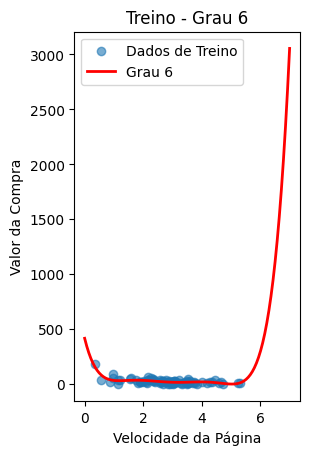

In [16]:
# Gráfico de Treino
plt.subplot(1, 2, 1)
plt.scatter(trainX, trainY, alpha=0.6, label='Dados de Treino')
plt.plot(xp, best_model(xp), 'r-', linewidth=2, label=f'Grau {best_degree}')
plt.title(f'Treino - Grau {best_degree}')
plt.xlabel('Velocidade da Página')
plt.ylabel('Valor da Compra')
plt.legend()

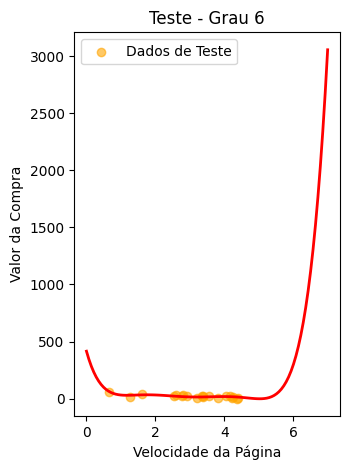

In [17]:
# Gráfico de Teste
plt.subplot(1, 2, 2)
plt.scatter(testX, testY, alpha=0.6, color='orange', label='Dados de Teste')
plt.plot(xp, best_model(xp), 'r-', linewidth=2)
plt.title(f'Teste - Grau {best_degree}')
plt.xlabel('Velocidade da Página')
plt.ylabel('Valor da Compra')
plt.legend()

plt.tight_layout()
plt.show()